In [1]:
%run ./startup_file.ipynb #run startup file and install libraries if necessary
proj_name = '\SEASCAPES'

# TIMESERIES_SEASCAPES

## Author: haley synan

##### *Last run on 2024-07-02*

## Load data (from file)
If you have data thats already downloaded, you can just load it from a file 

In [2]:
#load sst data from file 
os.chdir(data_dir+'\SST') #cd to SST directory
os.getcwd() #check for correct dir 
file = r'C:\Users\haley.synan\Documents\SEASCAPES\DATA\SST\DD1_20210601_20210831.nc'#file path 
sst = xr.open_dataset(file, decode_cf=True) #open nc file 
sst #inspect xarray dataset

<xarray.Dataset> Size: 156MB
Dimensions:                  (time: 92, latitude: 599, longitude: 706)
Coordinates:
  * time                     (time) datetime64[ns] 736B 2021-06-01T12:00:00 ....
  * latitude                 (latitude) float32 2kB 46.37 46.35 ... 34.43 34.41
  * longitude                (longitude) float32 3kB -77.69 -77.67 ... -63.59
Data variables:
    sea_surface_temperature  (time, latitude, longitude) float32 156MB ...
Attributes: (12/63)
    acknowledgement:                        Please acknowledge the use of the...
    aggregator_version:                     V1.00
    cdm_data_type:                          Grid
    col_count:                              18000
    col_start:                              0
    collation_version:                      2.11.0
    ...                                     ...
    summary:                                Sea surface temperature retrieval...
    testOutOfDate:                          now-95days
    time_coverage_end:                      2021-08-31T12:00:00Z
    time_coverage_start:                    2021-06-01T12:00:00Z
    title:                                  Sea-Surface Temperature, NOAA ACS...
    Westernmost_Easting:                    -77.69

In [3]:
#load chla data from file 
os.chdir(data_dir+'\SST') #cd to SST directory
os.getcwd() #check for correct dir 
file = r'C:\Users\haley.synan\Documents\SEASCAPES\DATA\Chlorophyll\DD8_20210601_20210831.nc'#file path 
chl = xr.open_dataset(file, decode_cf=True) #open nc file 
chl #inspect xarray dataset

<xarray.Dataset> Size: 27MB
Dimensions:    (time: 92, latitude: 217, longitude: 339)
Coordinates:
  * time       (time) datetime64[ns] 736B 2021-06-01 2021-06-02 ... 2021-08-31
  * latitude   (latitude) float64 2kB 42.98 42.94 42.9 ... 34.06 34.02 33.98
  * longitude  (longitude) float64 3kB -77.69 -77.65 -77.6 ... -63.65 -63.6
Data variables:
    chlor_a    (time, latitude, longitude) float32 27MB ...
Attributes: (12/52)
    cdm_data_type:                     Grid
    comment:                           See summary attribute
    Conventions:                       CF-1.7, COARDS, ACDD-1.3
    creation_date:                     20220122T163105Z
    creator_email:                     help@esa-oceancolour-cci.org
    creator_name:                      Plymouth Marine Laboratory
    ...                                ...
    time_coverage_end:                 2021-08-31T00:00:00Z
    time_coverage_resolution:          P1D
    time_coverage_start:               2021-06-01T00:00:00Z
    title:                             ESA CCI Ocean Colour Product (CCI ALL-...
    tracking_id:                       332587d5-faae-4968-a7c5-babf3626a796
    Westernmost_Easting:               -77.6875

In [4]:
#load seascpaes data from file 
os.chdir(data_dir+'\SEASCAPES') #cd to SST directory
os.getcwd() #check for correct dir 
file = r'C:\Users\haley.synan\Documents\SEASCAPES\DATA\SEASCAPES\DD8_20210601_20210831.nc'#file path 
seascapes = xr.open_dataset(file, decode_cf=True) #open nc file 
seascapes #inspect xarray dataset

<xarray.Dataset> Size: 5MB
Dimensions:    (time: 9, latitude: 240, longitude: 283)
Coordinates:
  * time       (time) datetime64[ns] 72B 2022-05-01T12:00:00 ... 2022-07-04T1...
  * latitude   (latitude) float32 960B 34.42 34.47 34.53 ... 46.28 46.33 46.38
  * longitude  (longitude) float32 1kB -77.68 -77.62 -77.57 ... -63.62 -63.58
Data variables:
    CLASS      (time, latitude, longitude) float32 2MB ...
    P          (time, latitude, longitude) float32 2MB ...
Attributes: (12/38)
    acknowledgement:            The U.S. MBON projects are funded under the N...
    cdm_data_type:              Grid
    contact:                    Joaquin.Trinanes@noaa.gov/mkavanau@ceoas.oreg...
    Conventions:                COARDS, CF-1.4, Unidata Dataset Discovery v1.0
    creator_email:              Joaquin.Trinanes@noaa.gov/mkavanau@ceoas.oreg...
    creator_type:               group
    ...                         ...
    summary:                    Biogeographic framework. Space and time class...
    time_coverage_duration:     P0Y1M0DT0H0M0S
    time_coverage_end:          2022-07-04T12:00:00Z
    time_coverage_start:        2022-05-01T12:00:00Z
    title:                      8_Day Global Seascapes
    Westernmost_Easting:        -77.675

In [5]:
num_files = len(seascapes.CLASS)

Text(0.5, 1.0, 'Seascapes Class 21: 2021-06-01 to 2021-08-31')

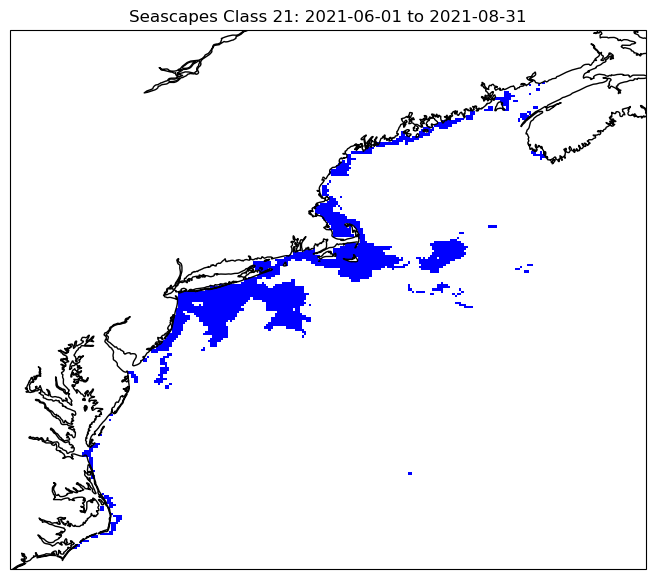

In [7]:
#plot all dates on top of each other for ONE class
from matplotlib import colors as c
start_date = '2021-06-01' #(yyyy-mm-dd format)
end_date = '2021-08-31'

cMap = c.ListedColormap(['w','b']) #define colormap (masked values will be white, presence will be in blue)


mask = []
classnum = 21
for x in range(num_files):
    cn= np.ma.masked_where(seascapes.CLASS.values[x]==classnum, seascapes.CLASS.values[x])
    mask.append(cn)

fig = plt.figure(figsize=(10, 7)) #set figure size
map_projection = cartopy.crs.PlateCarree() #set map projection
ax = plt.axes(projection=map_projection) 
#cn= np.ma.masked_where(seascapes.CLASS.values[1]==31, seascapes.CLASS.values[1])
for x in range(num_files):
    try:
        ax.pcolormesh(seascapes.longitude, seascapes.latitude,mask[x].mask, cmap=cMap) #set variables to plot
    except ValueError:
        pass

ax.coastlines()
plt.title('Seascapes Class' +  ' '+ str(classnum)  + ': '+start_date + ' '+'to' +' '+ end_date)
        


In [73]:
mask = []
classnum = 21
percent = []
for x in range(num_files):
    cn= np.ma.masked_where(seascapes.CLASS.values[x]==classnum, seascapes.CLASS.values[x])
    mask.append(cn)
    true_val = np.count_nonzero(mask[x].mask == True) 
    total_nonnan = np.count_nonzero(~np.isnan(mask[x].data)) #total number of pixels NON NAN
    perc = true_val / total_nonnan * 100  #PUT INTO LOOP AND FIND PERC FOR EACH DATE AND PLOT EACH DAT
    percent.append(perc)


mask = []
classnum = 13
percent_13 = []
for x in range(num_files):
    cn= np.ma.masked_where(seascapes.CLASS.values[x]==classnum, seascapes.CLASS.values[x])
    mask.append(cn)
    true_val = np.count_nonzero(mask[x].mask == True) 
    total_nonnan = np.count_nonzero(~np.isnan(mask[x].data)) #total number of pixels NON NAN
    perc = true_val / total_nonnan * 100  #PUT INTO LOOP AND FIND PERC FOR EACH DATE AND PLOT EACH DAT
    percent_13.append(perc)

mask_31 = []
classnum = 31
percent_31 = []
for x in range(num_files):
    cn= np.ma.masked_where(seascapes.CLASS.values[x]==classnum, seascapes.CLASS.values[x])
    mask_31.append(cn)
    true_val = np.count_nonzero(mask[x].mask == True) 
    total_nonnan = np.count_nonzero(~np.isnan(mask[x].data)) #total number of pixels NON NAN
    perc = true_val / total_nonnan * 100  #PUT INTO LOOP AND FIND PERC FOR EACH DATE AND PLOT EACH DAT
    percent_31.append(perc)



## Time Series
NOTE: This is plotting percent of NON NAN data. If you wanted to calculate the percent coverage of a class INCLUDING nan you could get the total value as: <br> $ totalwnan = mask[x].shape[0] * mask[x].shape[1] $
OR as  <br>
$ trueval = np.count_nonzero(mask[x].mask == True)  $ <br>
$ falseval = np.count_nonzero(mask[x].mask == False) $ <br>
$ totalwnan = true_val+false_val $

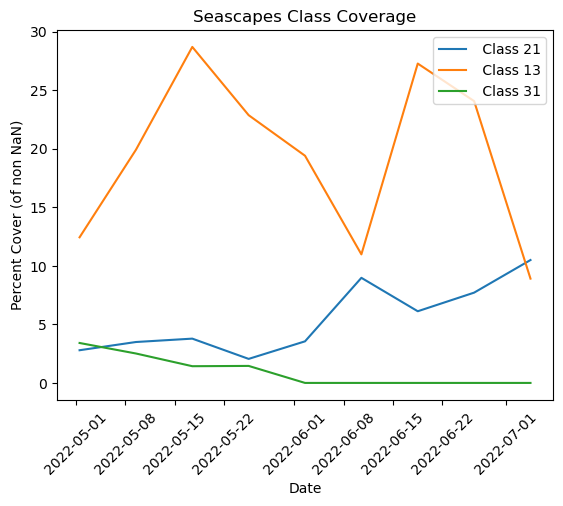

In [9]:
plt.plot(seascapes.time, percent, label=" Class 21")
plt.plot(seascapes.time, percent_13, label=" Class 13")
plt.plot(seascapes.time, percent_31, label=" Class 31")
plt.title('Seascapes Class Coverage')
plt.ylabel('Percent Cover (of non NaN)')
plt.xlabel('Date')
# change the fontsize
plt.tick_params(axis='x', labelsize=10) #change date tick label size
plt.xticks(rotation=45) #rotate date tick labels 45 degrees 
plt.legend(loc="upper right") #add legend

In [30]:
import xarray_regrid
sst_regridded = sst.regrid.linear(seascapes) #regrid data
chl_regridded = chl.regrid.linear(seascapes) #regrid data
d8 = sst_regridded.time[1].values

Text(0.5, 1.0, '2021-06-02')

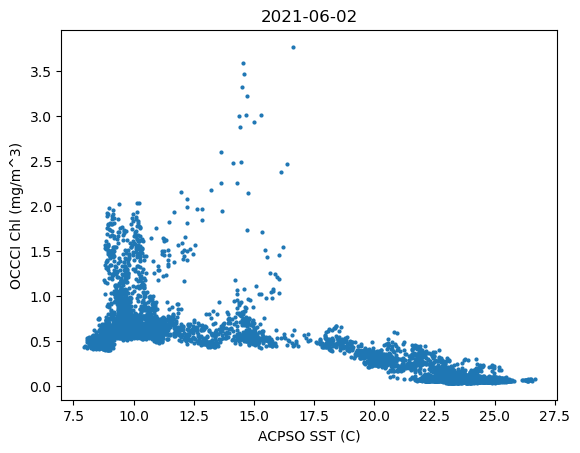

In [40]:
plt.scatter(sst_regridded.sea_surface_temperature.values[1],chl_regridded.chlor_a.values[1], s=4)
plt.xlabel('ACPSO SST (C)')
plt.ylabel('OCCCI Chl (mg/m^3)')
plt.title(str(d8).split('T')[0]) #convert datetime to string, split into yyymmdd

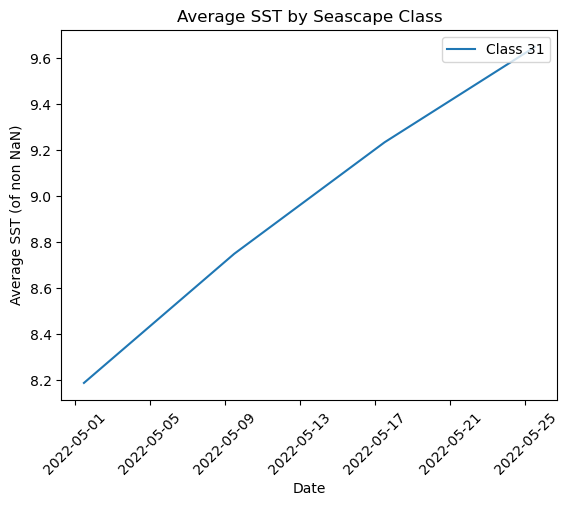

In [74]:
#plot time series of ONE seascape class's average SST 
avgs = []
for x in range(num_files):
    me = np.nanmean(sst_regridded.sea_surface_temperature.values[x][mask_31[x].mask]) #go each day and apply the mask for each day at ONE class (in this ex its 31)
    avgs.append(me) #create list of average SST for each date at the ONE class 


plt.plot(seascapes.time, avgs, label='Class'+' ' +str(classnum))
plt.title('Average SST by Seascape Class')
plt.ylabel('Average SST (of non NaN)')
plt.xlabel('Date')
# change the fontsize
plt.tick_params(axis='x', labelsize=10) #change date tick label size
plt.xticks(rotation=45) #rotate date tick labels 45 degrees 
plt.legend(loc="upper right") #add legend

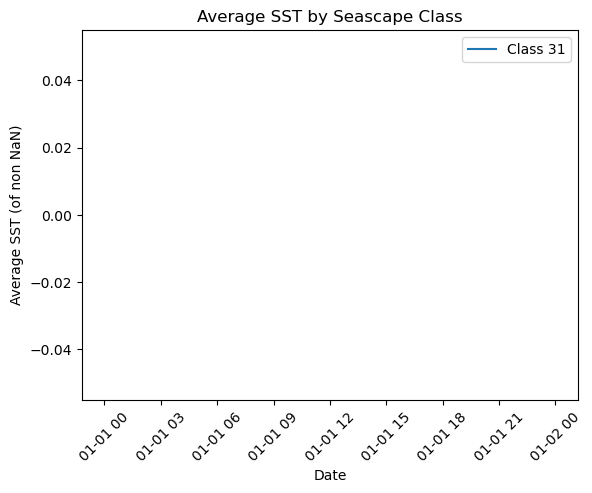

In [75]:
#plot time series of ONE seascape class's average SST 
avgs_chl = []
for x in range(num_files):
    me_chl = np.nanmean(chl_regridded.chlor_a.values[x][mask_31[x].mask]) #go each day and apply the mask for each day at ONE class (in this ex its 31)
    avgs_chl.append(me_chl) #create list of average SST for each date at the ONE class 


plt.plot(seascapes.time, avgs_chl, label='Class'+' ' +str(classnum))
plt.title('Average SST by Seascape Class')
plt.ylabel('Average SST (of non NaN)')
plt.xlabel('Date')
# change the fontsize
plt.tick_params(axis='x', labelsize=10) #change date tick label size
plt.xticks(rotation=45) #rotate date tick labels 45 degrees 
plt.legend(loc="upper right") #add legend

In [ ]:
mask

In [89]:
sst_regridded

<xarray.Dataset> Size: 25MB
Dimensions:                  (time: 92, latitude: 240, longitude: 283)
Coordinates:
  * time                     (time) datetime64[ns] 736B 2021-06-01T12:00:00 ....
  * latitude                 (latitude) float32 960B 34.42 34.47 ... 46.33 46.38
  * longitude                (longitude) float32 1kB -77.68 -77.62 ... -63.58
Data variables:
    sea_surface_temperature  (time, latitude, longitude) float32 25MB nan ......
Attributes: (12/63)
    acknowledgement:                        Please acknowledge the use of the...
    aggregator_version:                     V1.00
    cdm_data_type:                          Grid
    col_count:                              18000
    col_start:                              0
    collation_version:                      2.11.0
    ...                                     ...
    summary:                                Sea surface temperature retrieval...
    testOutOfDate:                          now-95days
    time_coverage_end:                      2021-08-31T12:00:00Z
    time_coverage_start:                    2021-06-01T12:00:00Z
    title:                                  Sea-Surface Temperature, NOAA ACS...
    Westernmost_Easting:                    -77.69